In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# Q1

In [2]:
olivetti = fetch_olivetti_faces()
imgs = olivetti.images
labels = olivetti.target
X = imgs.reshape((400, 4096)).transpose()

## 1.1

In [3]:
random_indices = np.random.randint(0, len(labels), 10)

In [4]:
random_indices

array([338, 196,  72, 228, 301, 227, 366, 179, 331, 356])

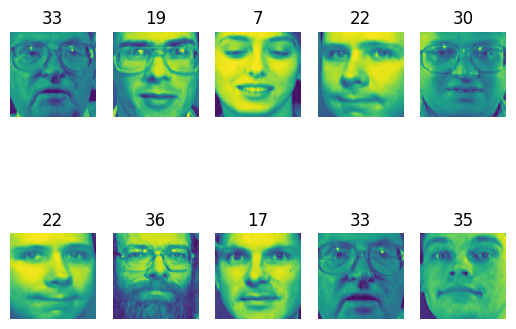

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=5)
axs = axs.reshape(-1)
for i in range(len(random_indices)):
    axs[i].imshow(X[:, random_indices[i]].reshape(64,64))
    axs[i].set_title(labels[random_indices[i]])
    axs[i].axis('off')

## 1.2

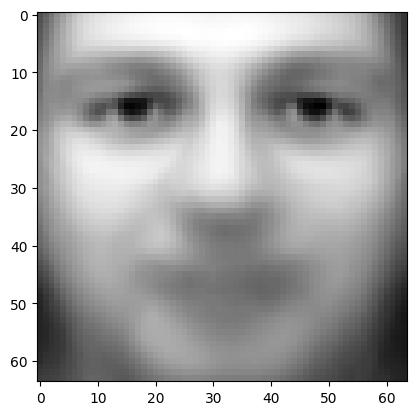

In [6]:
mean_X = X.mean(axis=1)
plt.imshow(mean_X.reshape(64,64), cmap='gray')

## 1.3

In [7]:
# Not full svd
U, S, VT = np.linalg.svd(X, full_matrices=False)
# Full svd
Uf, Sf, VTf = np.linalg.svd(X, full_matrices=True)
print(f'X shape: {X.shape}')
print(f'U full shape: {Uf.shape}, S full shape: {(Uf.shape[1], Sf.shape[0])}, VT full shape: {VTf.shape}')
print(f'U shape: {U.shape}, S shape: {(S.shape[0], S.shape[0])}, VT shape: {VT.shape}')

X shape: (4096, 400)
U full shape: (4096, 4096), S full shape: (4096, 400), VT full shape: (400, 400)
U shape: (4096, 400), S shape: (400, 400), VT shape: (400, 400)


As you can see when we set the full matrices to false the shape of the matrixes decrease. When we set this parameter to false we have the reduced form of svd that is when the dimensions of U, S, VT are reduced to the minimum number that is enough to represent the decomposition. In this situation for a m*n matrix the shapes of each matric is as follows:

U: m*m

S: m*n

VT: n*n

When we set the parameter to True we will receive the full-sized matrices. In this state the dimensions are as follows:

U: m * n

S: n * n

VT: n * m

## 1.4

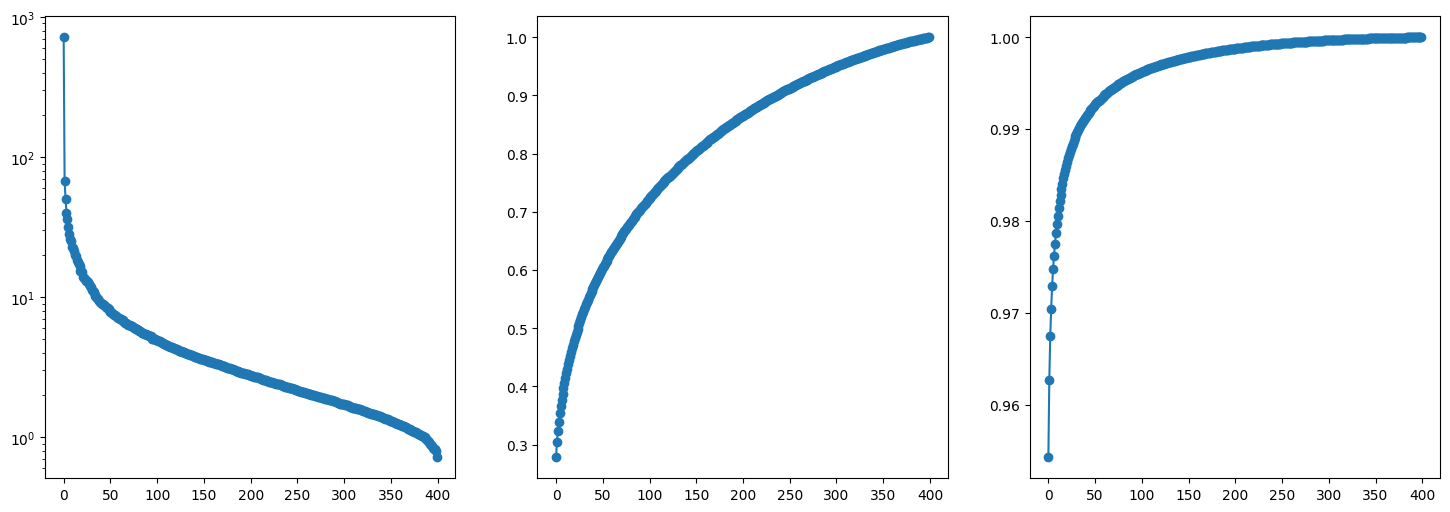

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
axs[0].semilogy(S, '-o')
axs[1].plot(np.cumsum(S)/np.sum(S), '-o')
axs[2].plot(np.cumsum(S**2)/np.sum(S**2), '-o') # Explain variance

##

## 1.5

In [9]:
def randomized_SVD(X, k):
  n, m = X.shape[0], X.shape[1]
  P = np.random.randn(m, k)
  Z = X @ P
  Q, _ = np.linalg.qr(Z)
  Y = Q.T @ X
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  return U, s, VT

In [10]:
## 1.6

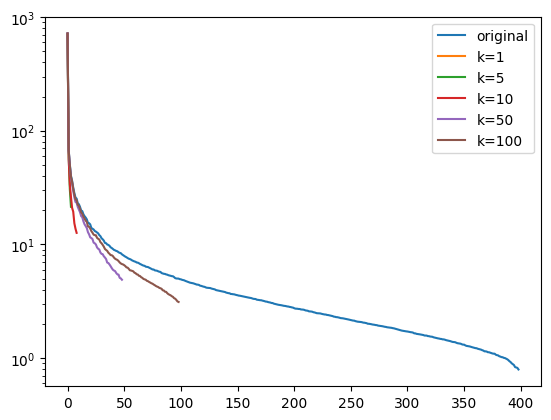

In [11]:
k_values = [1, 5, 10, 50, 100]
plt.semilogy(S[:-1], label='original')
for k in k_values:
    rU, rS, rVT = randomized_SVD(X, k)
    plt.semilogy(rS[:-1], label=f'k={k}')
    plt.legend()

In [12]:
## 1.7

In [13]:
X_mean = X.mean(axis = 1)
X_centered = X - X_mean[:, None]
U, s, VT = np.linalg.svd(X_centered, full_matrices = False)

In [14]:
errors = []
for k in k_values:
    reconstructed_x = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    errors.append(np.linalg.norm(X_centered - reconstructed_x, 'fro')**2 / np.linalg.norm(X_centered, 'fro')**2)

Text(0, 0.5, 'error')

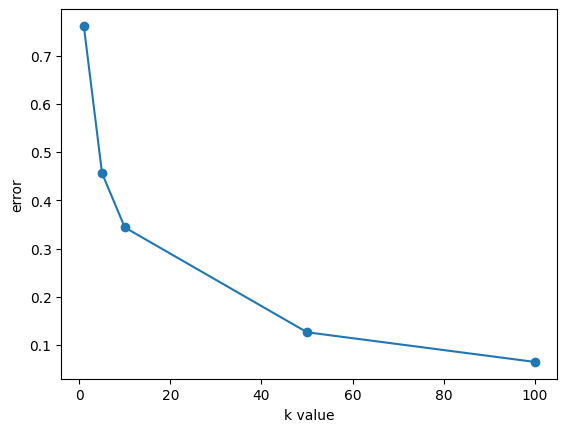

In [15]:
plt.plot(k_values, errors, marker='o')
plt.xlabel('k value')
plt.ylabel('error')

As we increase the K we can make a better data which is closer to the original data and making it more accurate. So increasing the k makes the error to become lower and decrease.

In [16]:
## 1.8

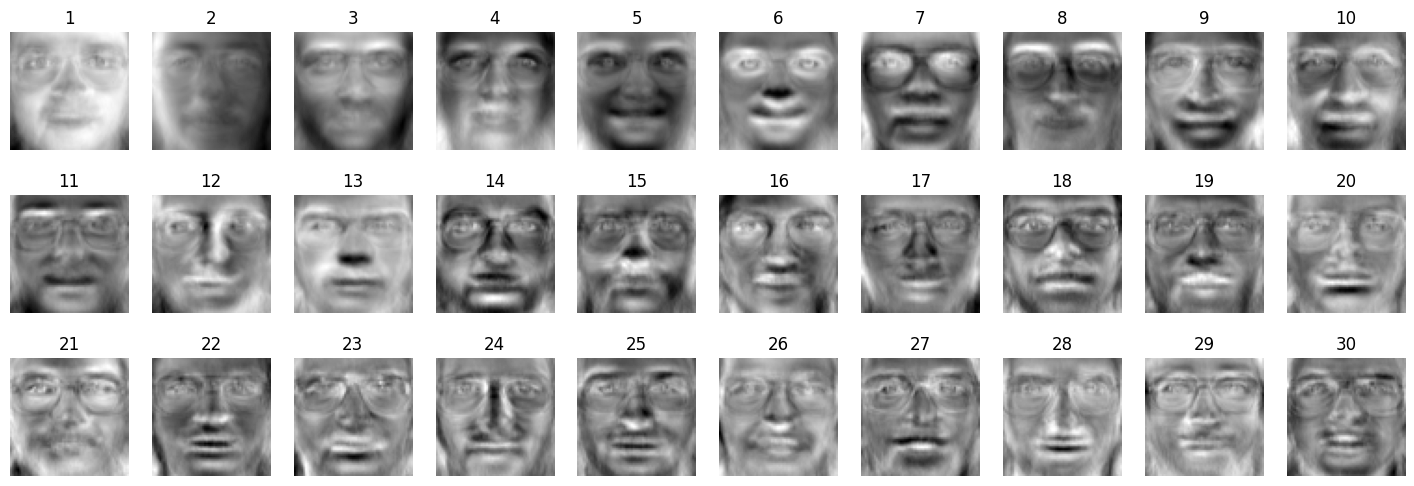

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=10, figsize=(18,6))
axs = axs.reshape((-1,))
for i in range(30):
    image_i = U[:,i].reshape((64,64))
    axs[i].imshow(image_i, cmap='gray')
    axs[i].set_title(f'{i+1}')
    axs[i].axis('off')

In [18]:
## 1.9

In [19]:
first_pc_list = []
second_pc_list = []
for i in range(len(labels)):
    if labels[i] == 0 or labels[i] == 39:
        first_pc_list.append((np.inner((X[:, i] - X_mean), U[:, 0]), labels[i]))
        second_pc_list.append((np.inner((X[:, i] - X_mean), U[:, 1]), labels[i]))

In [20]:
## 1.10

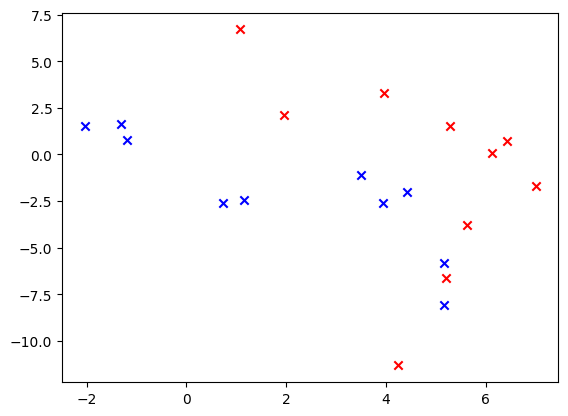

In [21]:
for i in range(len(first_pc_list)):
  x, label = first_pc_list[i]
  y, _ = second_pc_list[i]
  if label == 0:
    col = 'r'
  else:
    col = 'b'
  plt.scatter(x, y, marker='x', color=col)

In this plot it is clear that using the first 2 principle components we are able to make a classifier to classify the classes 0 and 39. We can draw a line in this plot and distinguish these two classes easily. 

# Q2

## 2.1

In ridge regression we want to minimize the following:

$$
\vec{\hat w_R}=\argmin_w f(\vec w)= \argmin_w ||\vec y-X\vec w||_2^2 + \lambda||\vec w||_2^2
$$

## 2.2

The soultion of the ridge regression is as follows: 
In order to compute it we should compute the derivative of the loss function and equal it to zero. In this way we are minimizing the loss function. The derivative should be with respect to W.

$$
\mathbf{w}^* = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y} 
$$

# 2.3

In [22]:
np.random.seed(55)
x = np.arange(np.pi,3*np.pi,0.1)
y = np.sin(x) + np.random.normal(0,0.1,len(x))

In [23]:
l_values = [0, 1e-32, 1e-16, 1e-8, 1e-2, 1, 16, 32, 1024.]

In [24]:
def calculate_w_star(x, y, l_value):
    return np.linalg.inv((x.T @ x) + l_value * np.identity(x.shape[1])) @ x.T @ y

In [25]:
new_x = np.column_stack((np.ones_like(x), x))

In [26]:
calculate_w_star(new_x, y, l_values[0])

array([-1.91417704,  0.30735787])

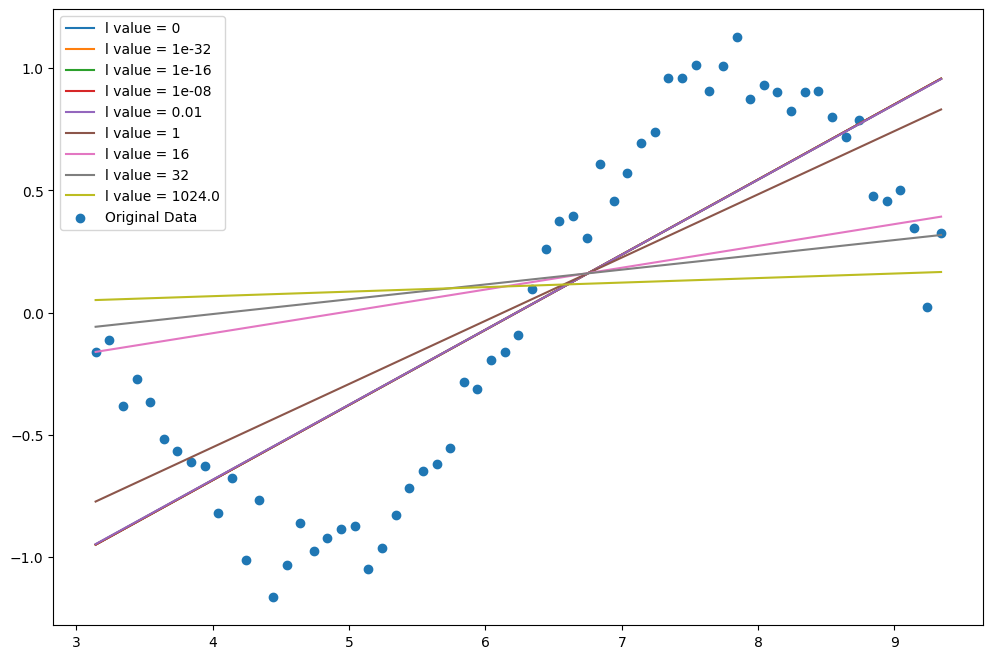

In [27]:
plt.figure(figsize=(12, 8))

for l_value in l_values:
    w_star = calculate_w_star(new_x, y, l_value)
    pred = new_x @ w_star
    
    plt.plot(x, pred, label=f'l value = {l_value}')

plt.scatter(x, y, label='Original Data')
plt.legend()

It seems that the pattern of prediction in large l values and small l values is the same to make the plot easier to read I plotted the data again with the lowest l value, highest l value and the l value that I think is the best. So the highest is 1024, lowest is 0 and the one that I think is the best is 1.

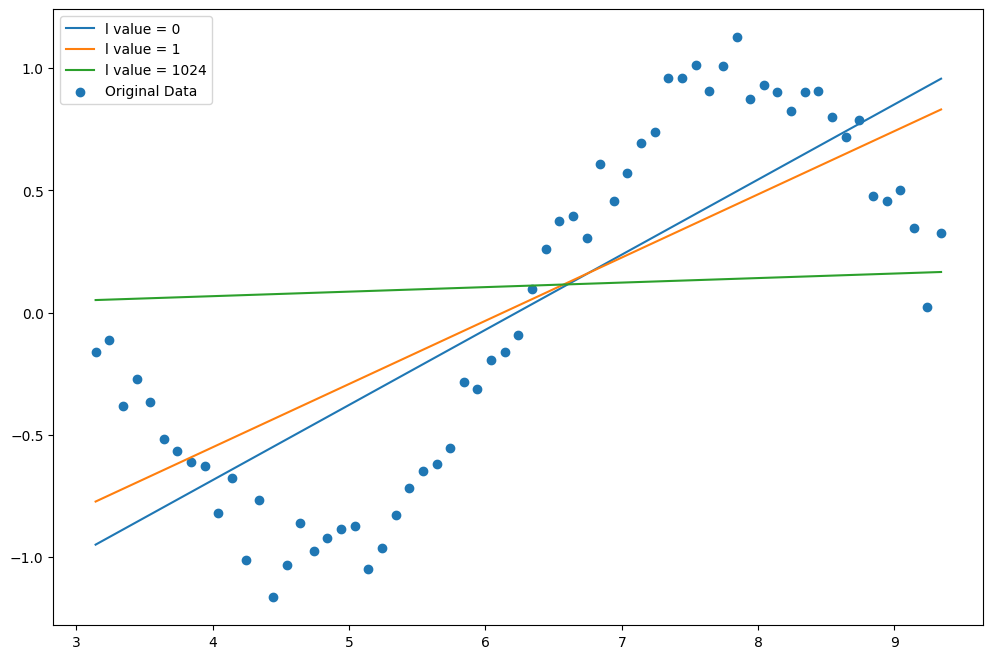

In [28]:
plt.figure(figsize=(12, 8))
new_l_values = [0, 1, 1024]
for l_value in new_l_values:
    w_star = calculate_w_star(new_x, y, l_value)
    pred = new_x @ w_star
    
    plt.plot(x, pred, label=f'l value = {l_value}')

plt.scatter(x, y, label='Original Data')
plt.legend()

In this plot it is clear that increasing the l value will result in weights become less important and the regularization term become much more important. So in very high l values the influence of regularization term is a lot and weights are not important as much as them so the model cannot learn the pattern well. 
In very low l values such as 0 we are basically implementing the linear regression so since the data is not linear our model cannot learn the patter and it results in underfit. 
So we have a trade off between the l values. Making it a lot large or a lot small both result in bad learning of the data. The best l value according to this plot is 1.